In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel('../datasets/COVID-19-geographic-disbtribution-worldwide.xlsx')

In [3]:
(df['countriesAndTerritories']=='Iran').sum()


319

In [4]:
select=df['countriesAndTerritories']=='Iran'
df_iran=df.loc[select,:].sort_values(by='dateRep').reset_index(drop=True)

In [5]:
df_iran=df.loc[select,:].set_index('dateRep')

In [6]:
df_iran

,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
dateRep,,,,,,,,,,,
2020-11-13,13,11,2020,11517,457,Iran,IR,IRN,82913893.0,Asia,156.359803
2020-11-12,12,11,2020,11780,462,Iran,IR,IRN,82913893.0,Asia,152.471432
2020-11-11,11,11,2020,10339,453,Iran,IR,IRN,82913893.0,Asia,146.494147
2020-11-10,10,11,2020,10463,458,Iran,IR,IRN,82913893.0,Asia,142.428483
2020-11-09,9,11,2020,9236,459,Iran,IR,IRN,82913893.0,Asia,136.997548
...,...,...,...,...,...,...,...,...,...,...,...
2020-01-04,4,1,2020,0,0,Iran,IR,IRN,82913893.0,Asia,NaN
2020-01-03,3,1,2020,0,0,Iran,IR,IRN,82913893.0,Asia,NaN
2020-01-02,2,1,2020,0,0,Iran,IR,IRN,82913893.0,Asia,NaN


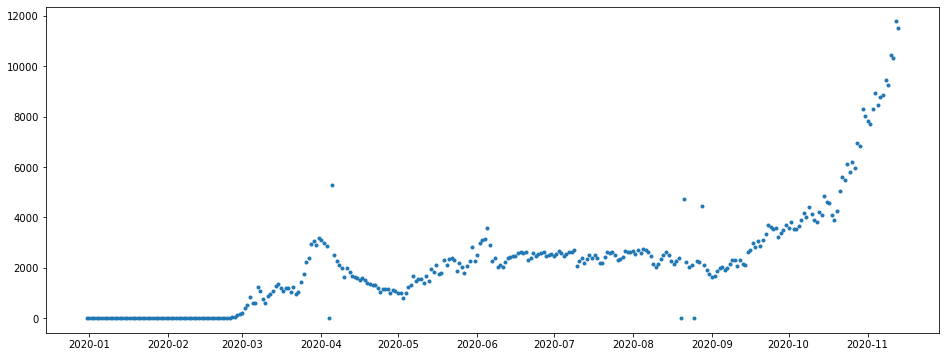

In [7]:
plt.figure(figsize=(16,6))
plt.plot(df_iran.loc[:,'cases'],'.')

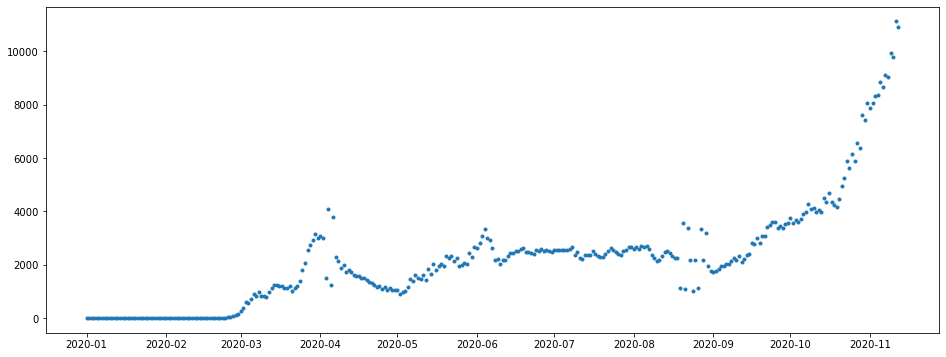

In [8]:
df_iran['expected_cases']=(df_iran['cases'].shift(1)+df_iran['cases'].shift(-1))/2
plt.figure(figsize=(16,6))
plt.plot(df_iran.loc[:,'expected_cases'],'.')

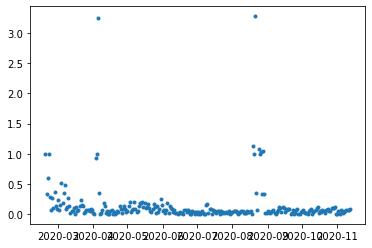

In [9]:
plt.plot(np.abs((df_iran.loc[:,'expected_cases']-df_iran.loc[:,'cases'])/df_iran.loc[:,'expected_cases']),'.')

In [10]:
isoutlier=np.abs((df_iran.loc[:,'expected_cases']-df_iran.loc[:,'cases'])/df_iran.loc[:,'expected_cases'])>0.7
df_iran.loc[isoutlier,'cases']=np.nan

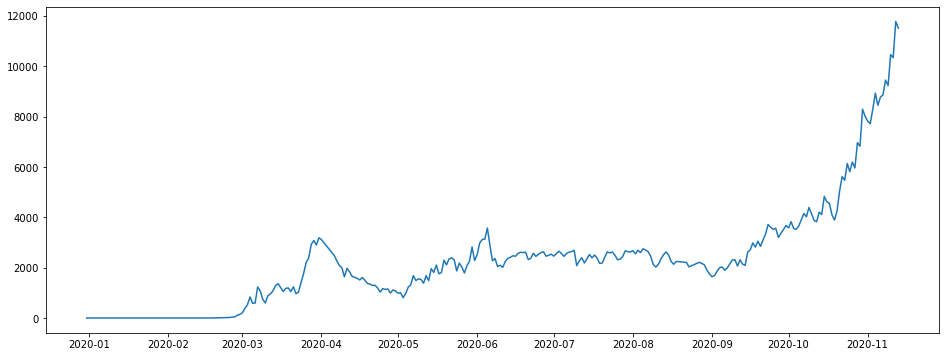

In [11]:
plt.figure(figsize=(16,6))
plt.plot(df_iran.loc[:,'cases'].interpolate(methode='linear'))